# PCA

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.decomposition import PCA

# Build a 3D dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [3]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [4]:
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [5]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [6]:
# The first dimension explains 84.2% of the variance, while the second explains 14.6%.

# By projecting down to 2D, we lost about 1.1% of the variance:

In [7]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [8]:
X_pca = pca.transform(X)
print('original shape: {}'.format(str(X.shape)))
print('reduced shape: {}'.format(str(X_pca.shape)))

original shape: (60, 3)
reduced shape: (60, 2)


### Number of Dimensions

In [9]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

2


In [10]:
pca = PCA(n_components = 0.95)

### Eigenfaces for faeture extraction

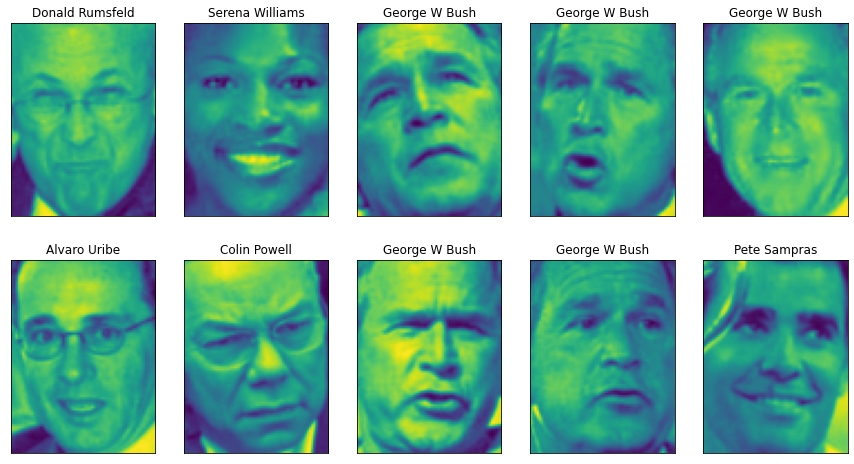

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [12]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))
# There are 3,023 images, each 87*65 pixel large, belonging to 62 different people.

people.images.shape: (1985, 87, 65)
Number of classes: 29


In [13]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Atal Bihari Vajpayee       24   
Bill Clinton               29   Colin Powell              236   Donald Rumsfeld           121   
George Robertson           22   George W Bush             530   Gerhard Schroeder         109   
Gloria Macapagal Arroyo    44   Hamid Karzai               22   Hans Blix                  39   
Igor Ivanov                20   John Ashcroft              53   Junichiro Koizumi          60   
Kofi Annan                 32   Laura Bush                 41   Lleyton Hewitt             41   
Megawati Sukarnoputri      33   Pete Sampras               22   Saddam Hussein             23   
Serena Williams            52   Tiger Woods                23   Tom Daschle                25   
Tony Blair                144   Vicente Fox                32   

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
# only take up to 50 images of each person
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

### k-Nearest-Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.42


### Let's try PCA

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

'''
whiten : bool, optional (default False)
When True (False by default) the components_ vectors are multiplied by the square root of n_samples 
and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances

'''
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (789, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.47


### Visualize the Principal Components

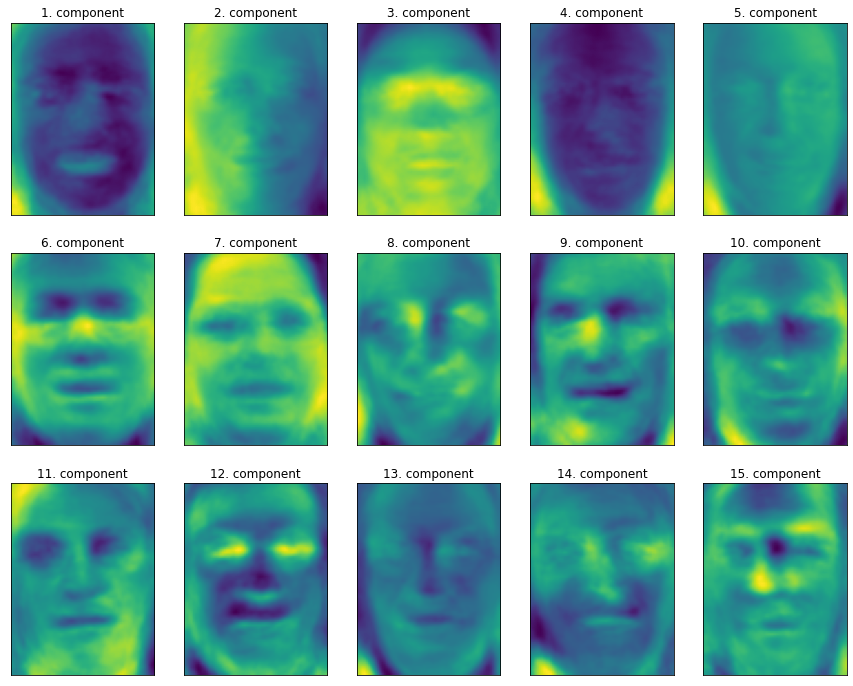

In [18]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.44183 , ..., 0.141176],
       ...,
       [0.488889, ..., 0.176471]], dtype=float32), 
array([[0.288889, ..., 0.824837],
       ...,
       [0.013072, ..., 0.90719 ]], dtype=float32))
________________________________________________________pca_faces - 0.7s, 0.0min


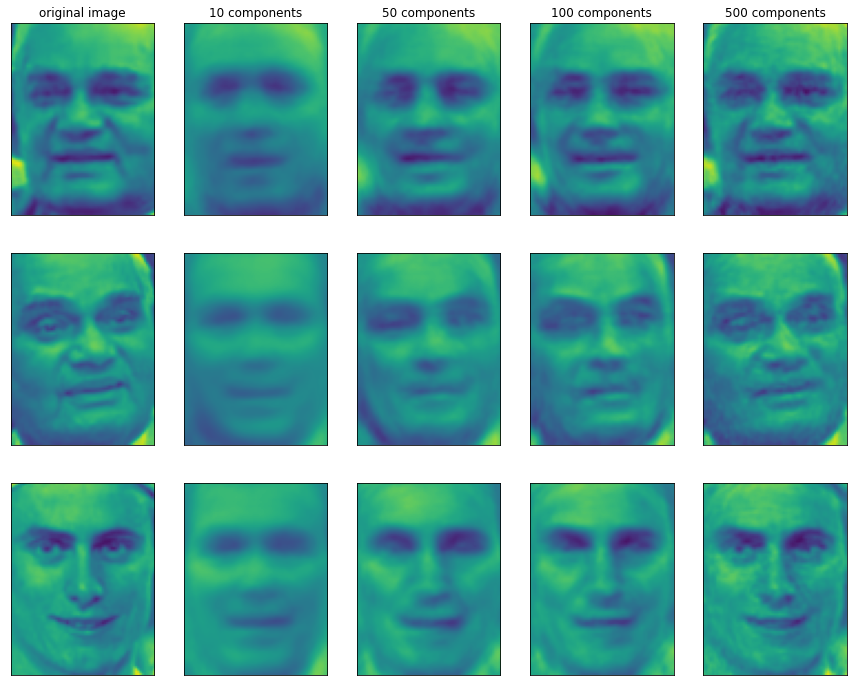

In [19]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

### Analyze the faces dataset with DBSCN

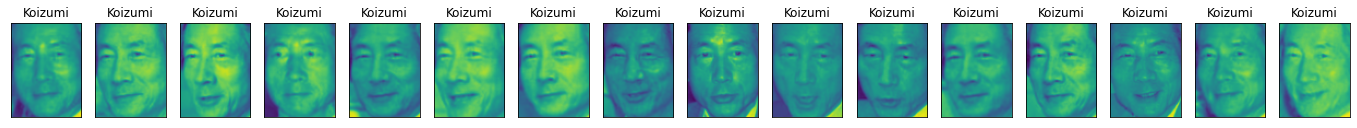

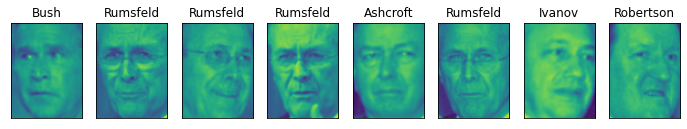

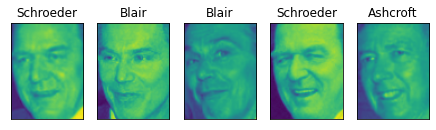

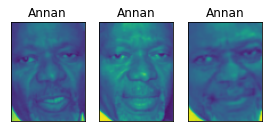

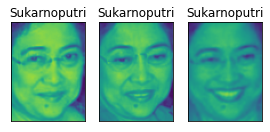

In [20]:
from sklearn.cluster import DBSCAN
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])